# MSikos Achievement 2 Exercise 2.4: Fundamentals of Visualization Libraries Part 2

Link to GitHub repository: https://github.com/MSikos

## 1. Import libraries, set system path, and import dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [3]:
# Set system path

path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialization Course\envs\Citi-Bike'
#path = r'C:\Users\Stony\Videos\CareerFoundry\Citi-Bike'


In [4]:
# Import dataset from prior exercise

df_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_data.csv'), index_col = 0)


C:\Users\Stony\AppData\Local\Temp\ipykernel_22500\3773934819.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_data.csv'), index_col = 0)


In [4]:
# Validate dataframe imported successfully

df_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')

In [5]:
df_cleaned.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-12-31,F2C4F070A50F9F3B,classic_bike,2022-12-31 13:09:50.131,2022-12-31 13:35:28.984,White St & Moore St,4987.06,Bleecker St & Crosby St,5679.08,40.704508,-73.935100,40.726156,-73.995102,member,8.2,31466,both
2022-12-31,79F3ED73A2BF585C,classic_bike,2022-12-31 17:33:04.512,2022-12-31 17:37:56.886,Division St & Bowery,5270.08,Centre St & Chambers St,5207.01,40.714193,-73.996732,40.712733,-74.004607,member,8.2,31466,both
2022-12-31,DDED85920D307CE1,classic_bike,2022-12-31 09:14:53.652,2022-12-31 09:21:11.859,W 30 St & 10 Ave,6459.07,W 20 St & 8 Ave,6224.05,40.752694,-74.002353,40.743453,-74.000040,member,8.2,31466,both
2022-12-31,98C9073F2BD6A968,classic_bike,2022-12-31 11:08:40.394,2022-12-31 11:22:18.629,5 Ave & 37 St,3379.03,6 Ave & 9 St,3803.09,40.652657,-74.002356,40.668127,-73.983776,member,8.2,31466,both
2022-12-31,4ACAA87B0BAD4FFF,electric_bike,2022-12-31 05:08:13.457,2022-12-31 05:14:43.204,W 30 St & 10 Ave,6459.07,W 20 St & 8 Ave,6224.05,40.752840,-74.002842,40.743453,-74.000040,member,8.2,31466,both


## 2. Create a dual-axis plot with Seaborn

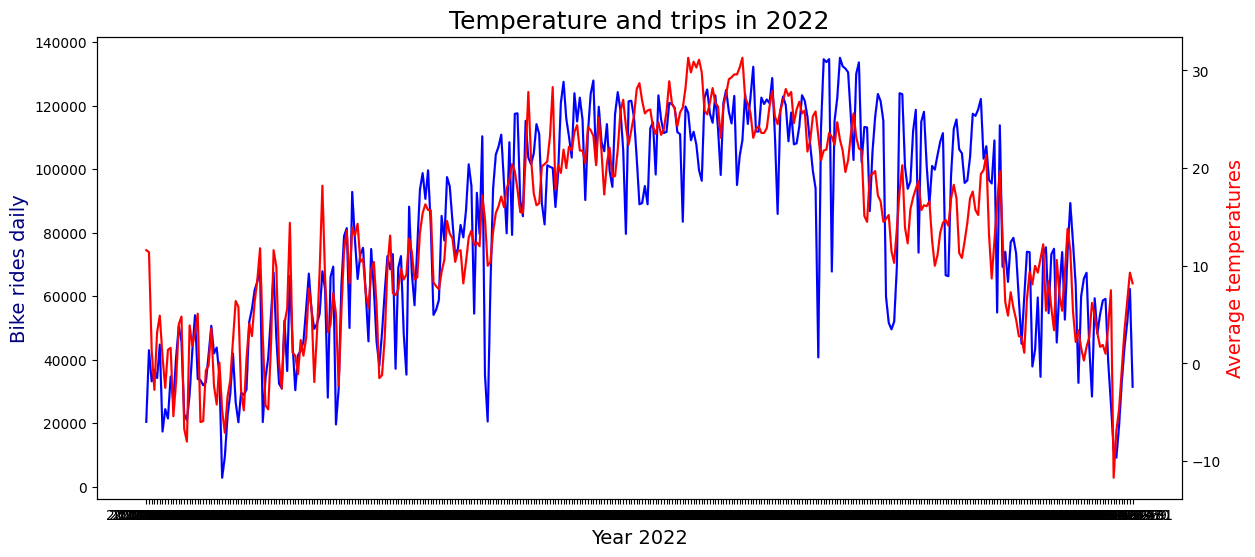

In [6]:
fig,ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data = df_cleaned['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_cleaned['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

## 3. Picking one theme, style, and palette

In [7]:
# Set the theme as ticks and the color palette as blue with decending saturation.

sns.set_theme(style="ticks", palette="Blues_r")


## 4 Create a bar chart of the 20 most popular starting stations

In [8]:
df_cleaned['value'] = 1

In [9]:
df_t = df_cleaned.groupby('start_station_name')['value'].count().reset_index()
df_t

,start_station_name,value
0,1 Ave & E 110 St,21526
1,1 Ave & E 16 St,67349
2,1 Ave & E 18 St,70854
3,1 Ave & E 30 St,45412
4,1 Ave & E 39 St,52373
...,...,...
1756,Wyckoff Ave & Gates Ave,16556
1757,Wyckoff St & 3 Ave,250
1758,Wyckoff St & Nevins St,11527
1759,Wythe Ave & Metropolitan Ave,66468


In [10]:
# Create a subset of the data containing only the top 20 stations

top20 = df_t.nlargest(20, 'value')
top20

,start_station_name,value
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856
461,Broadway & E 14 St,98862
485,Broadway & W 25 St,98422
1511,University Pl & E 14 St,97120
463,Broadway & E 21 St,95691
1603,W 31 St & 7 Ave,94208


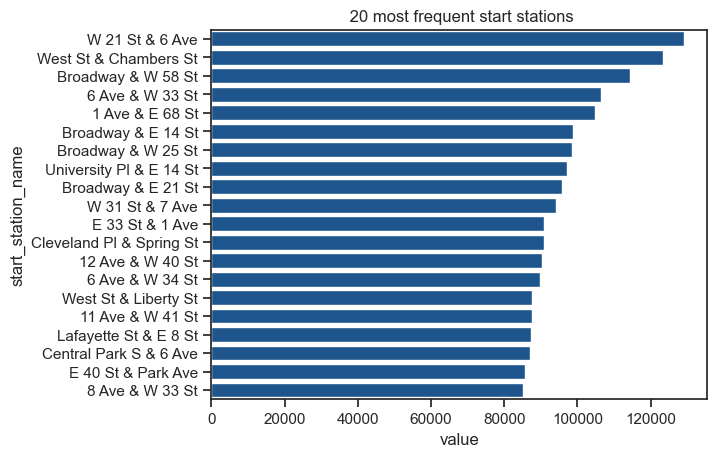

In [11]:
# Create a bar chart of the top 20 stations

sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title(" 20 most frequent start stations")
plt.show()

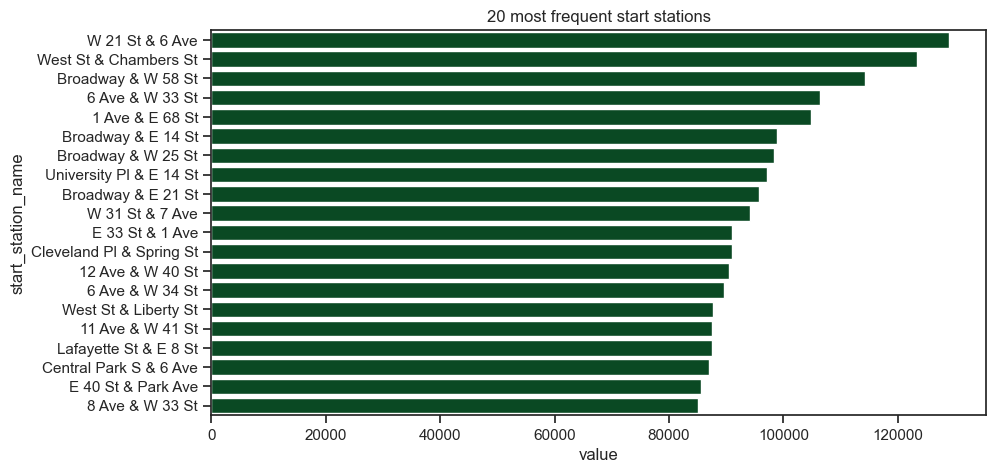

In [12]:
# Attempting to change the color palette and plot size of the barchart.

plt.figure(figsize = (10, 5))
with sns.color_palette('BuGn_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name').set_title("20 most frequent start stations")

I set the theme and color palette in the cells above the barplots, but they did not turn out as I expected. I initially set the theme to be a descending blue color with the darker blue color representing the more popular stations on top. The colors should have gone from darker blue to lighter blue as the number of trips from the stations got smaller and smaller. I then attempted to change the color palatte to a decending green color and defined the number of colors I wanted to be 20 to ensure that there are enough color variations to fit my plot. The result is the same as the blue palette above, with the color saturation not changing from the top of the plot to the bottom. Did I do something wrong with the code? 

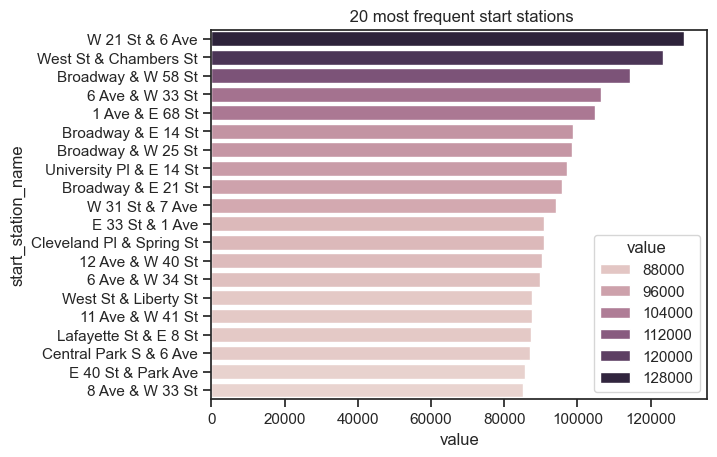

In [13]:
# Try customizing the color palatte by using the values instead of palatte codes

sns.barplot(data = top20, x = 'value', y = 'start_station_name', hue = 'value')
plt.title(" 20 most frequent start stations")
plt.show()

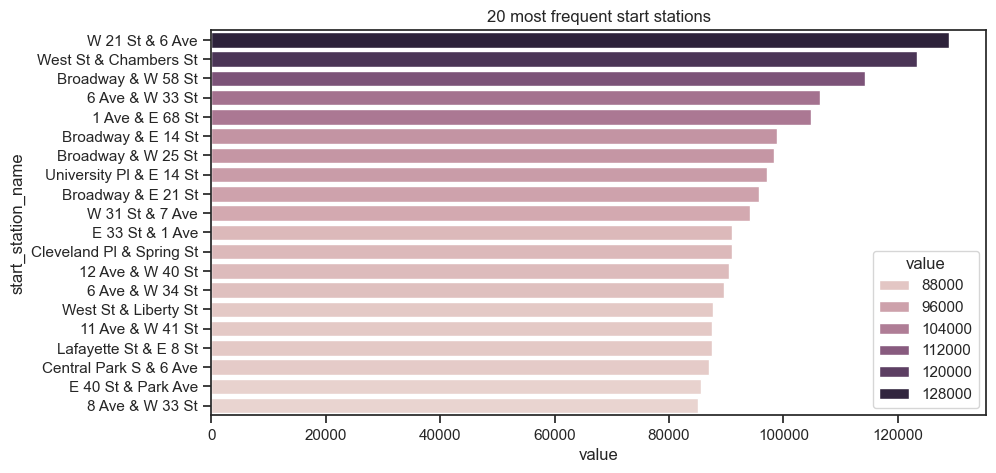

In [14]:
# Customize the bar chart by adjusting the plot size

plt.figure(figsize = (10, 5))
with sns.color_palette('BuGn_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name', hue = 'value').set_title("20 most frequent start stations")

## 5. Creating a box plot

In [4]:
# Confirm data types present in the dataframe

df_cleaned.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
_merge                 object
dtype: object

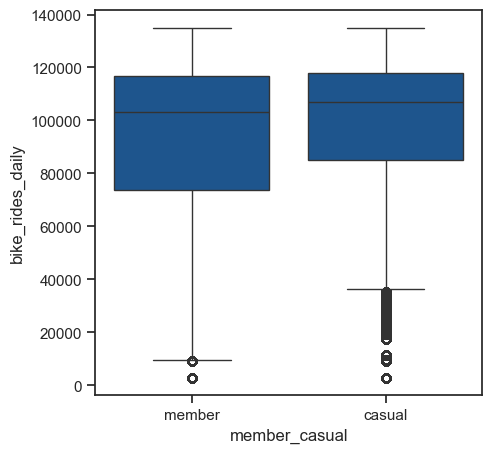

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df_cleaned)
plt.show()

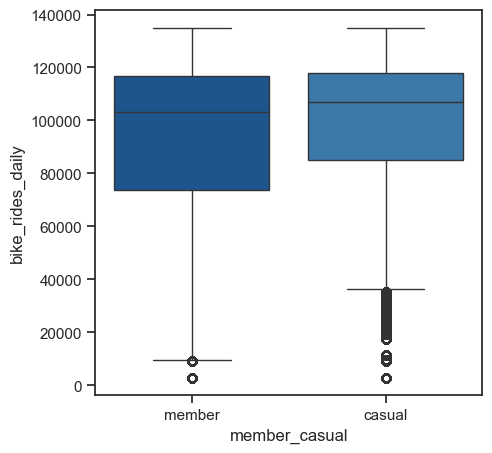

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df_cleaned, hue = 'member_casual')
plt.show()

In the box plots above, there are many more outliers in the casual bike rider boxplot. Also, the boxplots are shifted more upwards. The median between the members and the casual bikeriders are also very similar with around 100,00 daily bike rides for casual bike riders and members. The box and the values between the first and third quartile (25% and 75%) is larger for members group.

## 6. Create a FacetGrid plot

In [8]:

# Step 1: Convert the date column to datetime

df_cleaned['started_at'] = pd.to_datetime(df_cleaned['started_at'])

# Step 2: Extract the date part from the datetime

df_cleaned['ride_date'] = df_cleaned['started_at'].dt.date

# Step 3: Group by date and count the rides

daily_rides = df_cleaned.groupby('ride_date', as_index=False)['bike_rides_daily'].count()

# Create a complete date range for the year

date_range = pd.date_range(start='2022-01-01', end='2022-12-31')

# Reindex the daily_rides DataFrame to include all dates in the range

daily_rides = daily_rides.set_index('ride_date').reindex(date_range, fill_value=0).reset_index()

# Rename the columns for clarity

daily_rides.columns = ['date', 'total_rides']

# Display the result

print(daily_rides)

          date  total_rides
0   2022-01-01        20428
1   2022-01-02        43009
2   2022-01-03        33189
3   2022-01-04        36842
4   2022-01-05        34230
..         ...          ...
360 2022-12-27        33044
361 2022-12-28        44027
362 2022-12-29        51674
363 2022-12-30        62298
364 2022-12-31        31466

[365 rows x 2 columns]


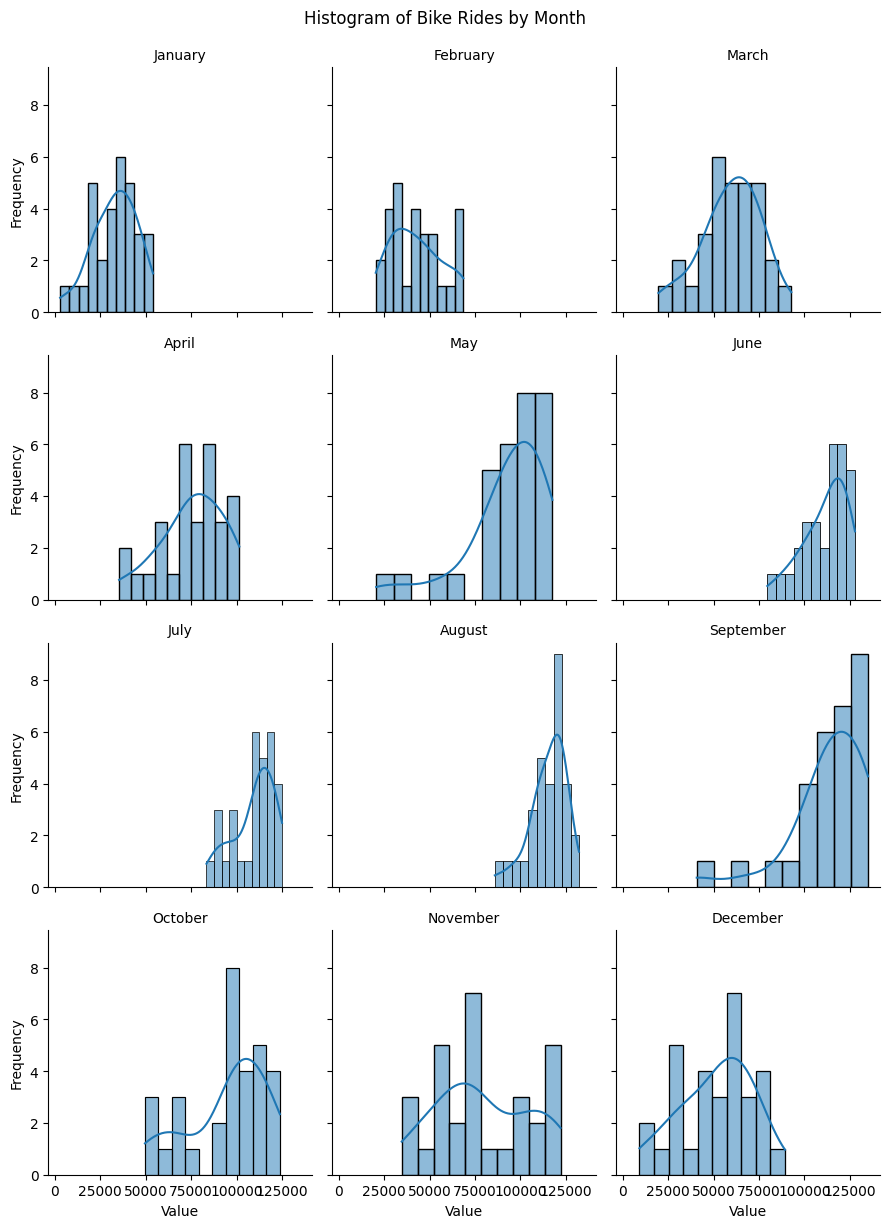

In [31]:
# Create a dataframe using the daily_rides data

data = pd.DataFrame(daily_rides)

# Create a new column for the month to use in facet grid

data['Month'] = data['date'].dt.month

# Create a column converting month number to month name

data['month_name'] = pd.to_datetime(data['Month'], format='%m').dt.strftime('%B')

# Set up the facet grid

g = sns.FacetGrid(data, col='month_name', col_wrap=3, height=3, sharex=True, sharey=True)

# Map the histogram to the facet grid

g.map(sns.histplot, 'total_rides', bins=10, kde=True)

# Add titles and adjust layout

g.set_titles(col_template='{col_name}')
g.set_axis_labels('Value', 'Frequency')
g.fig.suptitle('Histogram of Bike Rides by Month', y=1.02)

# Show the plot

plt.show()

The FacetGrid clearly illustates that the number of bike rides per day are greater during the warmer months. We can see a larger number of riders per day from April through November. In the winter months, December through March, there are much fewer bike riders which makes sense due to the temperature and possibility of snow on the ground.

## 7. Final review of the dataframe, then exporting dataframe

In [32]:
df_cleaned.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
bike_rides_daily               int64
_merge                        object
started               datetime64[ns]
ride_date                     object
dtype: object

In [33]:
# Drop the _merge column from the dataframe and validate column dropped successfully

df_cleaned.drop(columns = {'_merge'}, inplace = True)
df_cleaned.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,started,ride_date
date,,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,20428,2022-01-01 16:01:22.082,2022-01-01
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,2022-01-01 14:07:04.344,2022-01-01
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,2022-01-01 12:02:26.943,2022-01-01
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,20428,2022-01-01 22:53:23.508,2022-01-01
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,20428,2022-01-01 08:04:51.755,2022-01-01


In [34]:
df_cleaned.shape

(29838166, 17)

In [35]:
# Export final dataframe

data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'rides_per_day.csv'))
df_cleaned.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.csv'))